# Flying-Fox On The Run

<img src="grey headed flyingfox.png" alt="flyingfox image" width="400px" style="float:right">

<div>The flying-fox monitoring program was implemented to collect information on the abundance and distribution of flying-fox population in eastern Australia over time. The data provides an indication into population trends and other ecological factors. The monitoring of flying-foxes is especially important as two species, the grey-headed flying-fox and the spectacled flying-fox, are listen as threatened under the Commonwealth Environmental Protection and Biodiversity Conservation Act 1999.

The Australian Government put $6 million towards Hendra Virus Research. Hendra virus is a bat-borne virus that affected horses, which then can be passed onto people, so the monitoring of flying-foxes also helps inform responsd to concerns about potential Hendra outbreaks</div>

The datasets describe Queensland’s known flying-fox roosts and the magnitude of flying-foxes by species (black flying-fox, grey-headed flying-fox, little red flying-fox, spectacled flying-fox).

<div style="font-size:18px; vertical-align: bottom;">All datasets were retrieved from data.gov.au</div>

where flying-foxes are

distribution

change throughout years

### Useful Information

##### What is a roost/camp
A roost or a camp (but i refer to it as a camp throughout the project) are a patch of trees which flying-foxes are found in during the day.

#### I did some imports

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import geopandas as gp
import shapely
import fiona
import seaborn as sns
from matplotlib import cycler
from datetime import datetime
from matplotlib import rcParams
from shapely.geometry import Point

#### I also applied some style states

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 15)
saved_style_state = matplotlib.rcParams.copy()

In [3]:
colors = cycler(color=['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#da8bc3'])
plt.rc('axes', prop_cycle=colors)

#### Reading and joining datasets

In [4]:
dataframes = []
for f in os.listdir("fox"):
    print(f)
    df = pd.read_csv(os.path.join("fox", f), parse_dates=[4])
    dataframes.append(df)

fox_df = pd.concat(dataframes)

flying-fox-monitoring-apr-jul-2016.csv
flying-fox-monitoring-apr-jun-2017.csv
flying-fox-monitoring-apr-jun-2018.csv
flying-fox-monitoring-apr-jun-2019.csv
flying-fox-monitoring-jan-mar-2016.csv
flying-fox-monitoring-jan-mar-2017.csv
flying-fox-monitoring-jan-mar-2018.csv
flying-fox-monitoring-jan-mar-2019.csv
flying-fox-monitoring-jul-sep-2017.csv
flying-fox-monitoring-jul-sep-2018.csv
flying-fox-monitoring-jul-sep-2019.csv
flying-fox-monitoring-oct-dec-2016.csv
flying-fox-monitoring-oct-dec-2017.csv
flying-fox-monitoring-oct-dec-2018.csv
flying-fox-monitoring-oct-dec-2019.csv


In [5]:
fox_df.sample(2)

,Name of local government,Name of camp,Latitude,Longitude,Date of survey,Flying-fox absent (true/false),Total number of black flying-fox,Total number of Grey-headed flying-fox,Total number of Little red flying-fox,Total number of Spectacled flying-fox,Total number of all species,EHP camp identification,CSIRO camp identification
34,Mackay,Eungella State School,-21.135800,148.492000,2016-05-20,False,0,0.0,0,0,0,307,340.0
71,Sunshine Coast,"Palmwoods, Dunning Street",-26.690983,152.953975,2019-05-16,False,0,0.0,0,0,0,205,418.0


#### Shape of dataset

In [6]:
shape = fox_df.shape
print("Rows: " + str(shape[0]))
print("Columns: " + str(shape[1]))

foxlist = "Total number of black flying-fox", "Total number of Grey-headed flying-fox", "Total number of Little red flying-fox", "Total number of Spectacled flying-fox"
fox_df.columns

print("Each row in the data is one survey entry")

Rows: 1763
Columns: 13
Each row in the data is one survey entry


#### General Overview of Where Flying-Foxes Are

In [7]:
fox_df_campclean = fox_df.drop_duplicates("Name of camp")

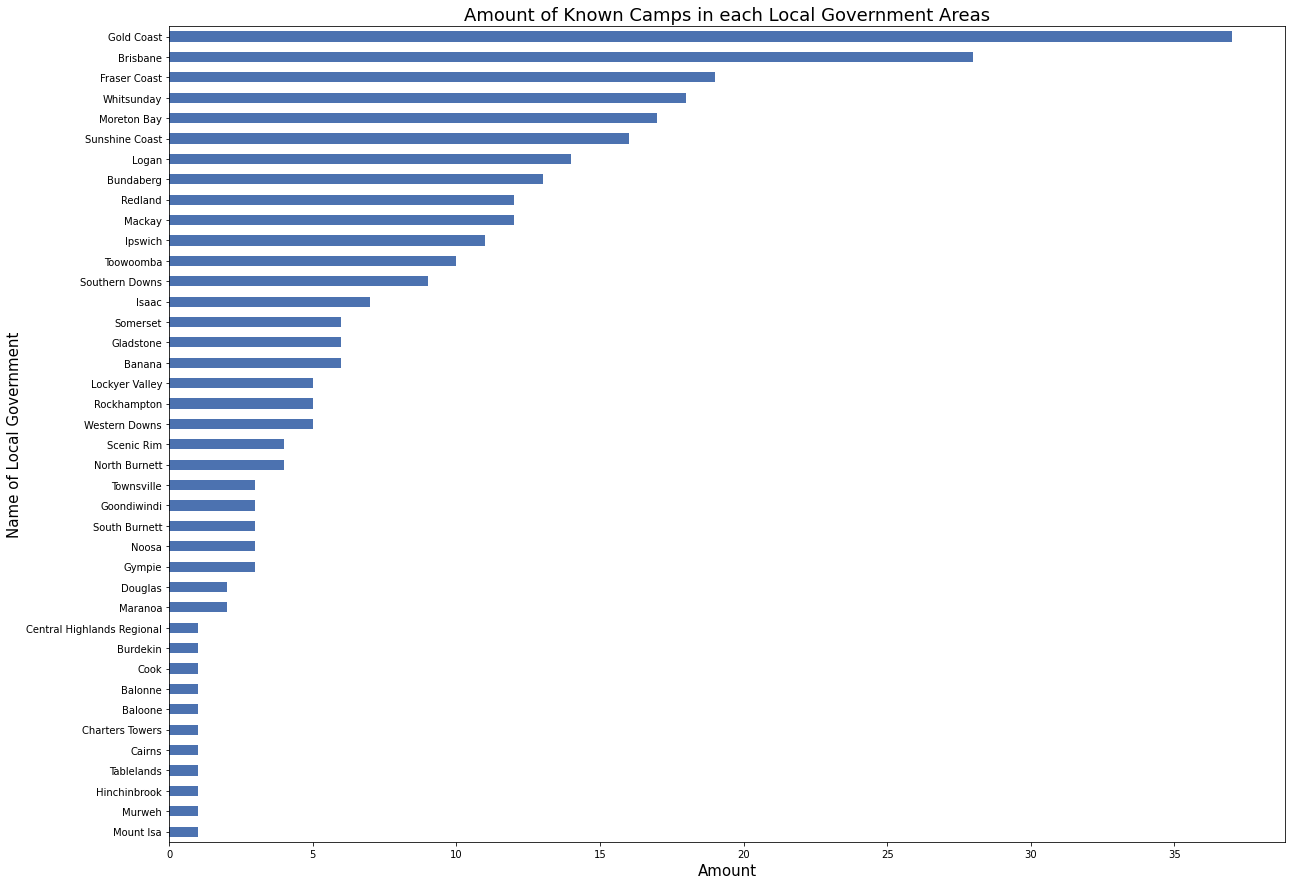

In [8]:
reversed_fox_df = fox_df_campclean["Name of local government"].value_counts().plot.barh()
reversed_fox_df.invert_yaxis()
plt.title("Amount of Known Camps in each Local Government Areas", fontsize=18)
plt.xlabel('Amount', fontsize=15)
plt.ylabel('Name of Local Government', fontsize=15)
plt.grid(False)
plt.show()

##### Queensland mapping

In [ ]:
zip_file_name = "maps\qld_locality_polygon_shp.zip"
shp_file_name = "QLD_LOCALITY_POLYGON_shp"
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()


map_file = unzip_zipfile(zip_file_name)

burbs = gp.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
burbs.head(7)

cols_to_drop = ["QLD_LOCA_1", "QLD_LOCA_3", "QLD_LOCA_4", "QLD_LOCA_6", "DT_RETIRE"]
burbs.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")
burbs.head(7)

In [ ]:
qld_cities_df = pd.read_csv("queensland cities.csv")
qld_cities_df["Coordinates"] = list(zip(qld_cities_df.lng, qld_cities_df.lat))
qld_cities_df.head()
qld_cities_df["Coordinates"] = qld_cities_df["Coordinates"].apply(Point)
qld_cities_df.head()

qld_cities_gdf = gp.GeoDataFrame(qld_cities_df, geometry="Coordinates")